<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity-Differentiation-Day2-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation: Forward and backward differences

Derivatives and integrals are ubiquitous across physics.  Whether you are trying to find an electric field from a series of point charges, determine the velocity of a star, or find the force on a particle, you'll need to take a derivative at some point.

Numerically, we can take a derivative by following the definition we learned in calculus, that is:

$
\frac{df}{dx} = \lim_{\Delta x \to 0 } \frac{\Delta f}{\Delta x} 
$

Of course, we (typically) don't know the function $f\left(x\right)$, but what we are often given is its value at different data points.  So if we have a set of datapoints, $x_i$, and a set of measurements, $f\left(x_i\right)$, we can estimate the derivative as being:

$
\frac{df}{dx} \approx \lim_{h \to 0 } \frac{f\left(x+h\right) - f\left(x\right)}{h} 
$

That is, the derivative is approximately the difference in observed values between two points that are spaced by a distance $h$.  

Of course, we can't actually make $h$ go to zero in a computer, it has to have some sort of finite value.  Therefore, we can approximate the value of the derivative by:

$
\frac{df}{dx} \approx  \frac{f\left(x+h\right) - f\left(x\right)}{h} 
$

For a fixed value of $h$. This definition above is the *forward difference* approach because it is measured in the forward (i.e., positive) direction.  

To use this to calculate the derivative at a position $x$ (that is, to calculate $f'\left( x\right)$) simply calculate the difference between two points (which is the numerator above) and divide by their respective $x$ distance (the demonitor above). 

There is also the *backward difference* approach, which is:

$
\frac{df}{dx} \approx \lim_{h \to 0 } \frac{f\left(x\right) - f\left(x-h\right)}{h} 
$

For many cases you can use either approach and you'll get just about the same result.  In some circumstances you may find one approach preferable to the other, for example if you have a discontinuity in your data or if you don't have a datapoint before or after where you are trying to calculate the derivative.

## Sources of error

In theory, the above definition should be all that you need to use.  However, there are two main sources of error that we need to consider:

1.  Rounding errors
2.  Truncation errors

We've already seen how rounding errors can create problems in computers.  Here, that means you can't make $h$ too small, otherwise you are dividing two small numbers by one another which will lead to inaccuracies.  Also, if $f\left(x+h\right)$ and $f\left(x\right)$ are close to one another, the calculation of the differences will be inaccurate.

To understand truncation error, let's consider the Taylor series for computing the value of $f\left(x+h\right)$:

$f\left(x+h\right) = f\left(x\right)  + h \cdot f'\left(x\right) + \frac{h^2}{2} \cdot f''\left(x\right) + \frac{h^3}{3!} \cdot f'''\left(x\right)+...$

(pro tip: if you aren't comfortable with Taylor series, I highly recommend getting familiar with them.  They come up EVERYWHERE in upper division physics).

We can rearrange this expression to find $f'\left(x\right)$:

$f'\left(x\right) = \frac{f\left(x+h\right) - f\left(x\right)}{h} - \frac{h}{2} \cdot f''\left(x\right) - \frac{h^2}{3!} \cdot f'''\left(x\right)-...$

Note the similarity of this formula to the forward difference approach above.  In fact, when we use the forward difference algorithm, we're calculating the first term on the right hand side, and we're ignoring the $f''\left(x\right)$ and higher terms.  By truncating this equation after the first term, we're introducing an approximation to our derivative, which we'll call $\epsilon$.  The size of that approximation is what we've cut off, namely:

$
\epsilon \approx \frac{h}{2} \cdot f''\left(x\right) - \frac{h^2}{3!} \cdot f'''\left(x\right)-...$

So if we want to make $\epsilon$ small, all we have to do is make $h$ small, since they are proportional (to a leading term).  The problem though is that if we make $h$ too small, we'll have numerical accuracy errors, as discussed above.

## Activity

###A

Write a python program to calculate the numerical derivative of the function 

$f\left(x\right) = \sin\left(x\right)$

at the point $x = 0.5$.  To do this, create two arrays.  The first should be x-coordinates and contain only two values: 0.5 and 0.5 + $h$, where $h$ is some small distance along the x-axis.  The second array should contain the corresponding  y-values of these points.

Using these arrays, calculate an estimate of $f'\left(x\right)$ using the forward difference approach. Do not use any sort of special numpy functions (you can do this with simple arithmetic).  In addition, determine the actual value of $f'\left(x\right)$.  How do these values compare?

###B. 
Write a function that compares the true derivative to the numerical one, and computes the percentage error to quantify this difference between the true and computed values:

> $error = \left.|\frac{\hat{y}_i-y_i}{y_i} \right.| \cdot 100$

where $y_i$ is the true value at a point and $\hat{y}_i$ is the estimate you are computing through numerical differentiation.  

###C.

Repeat part a for a range of different $h$ values.  Use:

$h = 2^{z}$

with z ranging from -50 to 1 (you'll likely need to create a loop over all values of $z$). For each value of $h$, compute the percent error.  Make a plot of $h$ vs the percent error (note that it might help to make a log/log plot, which you can do with the matplotlib ```plt.loglog``` function instead of the standard ```plt.plot``` function (see here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html).  What value of $h$ minimizes the error? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Write a function for percent error.  Take as input two values, the first being the exact and the second the approximation.  Return a number.

In [ ]:
def perc_error(exact,approx):
  return np.abs((exact-approx)/exact) * 100

Loop over values of z.  In each loop, calculate two arrays, x and y, each of which have two points.  Use the forward difference to calculate the derivative, and compare it to the exact value which you can get from calculus.  For each value of z, save the resulting percent error and $h$ to an array.  At the end, plot the two on a log/log plot.  

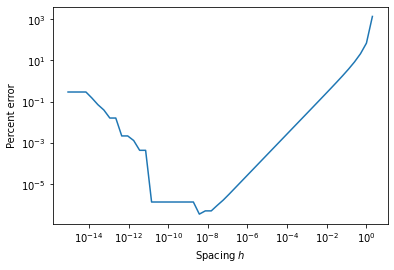

The minimum error occurs for h= 3.815e-06, and has a value of 4.0584e-10


In [ ]:
N = 52
h=np.zeros(N)
error_forward=np.zeros(N)

for i in range(N):
  h[i]=2**(i-50)
  x = np.array([0.5, 0.5 + h[i]])
  y = np.sin(x)  
  f_prime = (y[1]-y[0]) / (x[1]-x[0])
  error_forward[i] = perc_error(f_prime,np.cos(0.5))

plt.loglog(h,error_forward)
plt.xlabel('Spacing $h$')
plt.ylabel('Percent error')
plt.show()

print("The minimum error occurs for h= %6.3e, and has a value of %6.4e"%(h[np.argmin(error)],np.min(error)))

###D. 

If you have time, repeat the above but this time use the backward difference formula.  How much of a difference do you see? You may want to plot the error of the forward and backward approaches on the same plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Write a function for percent error.  Take as input two values, the first being the exact and the second the approximation.  Return a number.

In [ ]:
def perc_error(exact,approx):
  return np.abs((exact-approx)/exact) * 100

Loop over values of z.  In each loop, calculate two arrays, x and y, each of which have two points.  Use the backward difference to calculate the derivative, and compare it to the exact value which you can get from calculus.  For each value of z, save the resulting percent error and $h$ to an array.  At the end, plot the two on a log/log plot.  

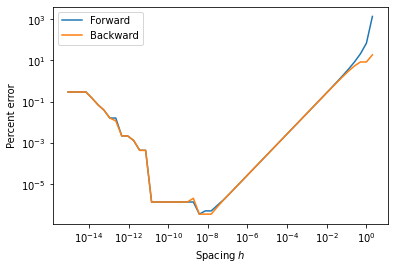

The minimum error occurs for h= 3.815e-06, and has a value of 4.0584e-10


In [ ]:
N = 52
h=np.zeros(N)
error_backward=np.zeros(N)

for i in range(N):
  h[i]=2**(i-50)
  x = np.array([0.5 - h[i],0.5])
  y = np.sin(x)  
  f_prime = (y[0]-y[1]) / (x[0]-x[1])
  error_backward[i] = perc_error(f_prime,np.cos(0.5))

plt.loglog(h,error_forward,h,error_backward)
plt.xlabel('Spacing $h$')
plt.ylabel('Percent error')
plt.legend(["Forward","Backward"])
plt.show()

print("The minimum error occurs for h= %6.3e, and has a value of %6.4e"%(h[np.argmin(error)],np.min(error)))

# Central difference

A simple improvement to the forward and backward differences is the *central difference* approach.  Central difference is similar to the forward and backward approaches, except now we use both one point before and another after the one we are interested in computing a derivative for.  To see why this works, consider the two Taylor series:

$f\left(x+h\right) = f\left(x\right)  + h \cdot f'\left(x\right) + \frac{h^2}{2} \cdot f''\left(x\right) + \frac{h^3}{3!} \cdot f'''\left(x\right)+...$

$f\left(x-h\right) = f\left(x\right)  - h \cdot f'\left(x\right) + \frac{h^2}{2} \cdot f''\left(x\right) - \frac{h^3}{3!} \cdot f'''\left(x\right)+...$

Subtracting the second equation from the first and rearranging for $f'\left(x\right)$ gives:

$f'\left(x\right) = \frac{f\left(x+h\right)-f\left(x-h\right)}{2h} - \frac{1}{3} h^2 f'''\left(x\right)+...$

This gives us an estimate for the derivative of:

$f'\left(x\right) = \frac{f\left(x+h\right)-f\left(x-h\right)}{2h}$

Which has a truncation error that is now on the order of $h^2$, not $h$.  This can lead to a significant improvement in accuracy!

## Activity

Modify your code in part c above to compute a central difference derivative.  Hint: you will need to change not only the formula for calculating $f'\left(x\right)$, but also another part of your code.  Create a new plot of the error vs spacing.  How does the error compare for computing the derivative at $\sin(0.5)$ for a range of $h$ values?  Discuss with your group which approach, forward, backward, or central difference, is best to use in each circumstance.  It may help to plot the errors of the forward, backward, and central approaches on the same plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Write a function for percent error.  Take as input two values, the first being the exact and the second the approximation.  Return a number.

In [ ]:
def perc_error(exact,approx):
  return np.abs((exact-approx)/exact) * 100

Loop over values of z.  In each loop, calculate two arrays, x and y, each of which have three points.  Use the central difference to calculate the derivative, and compare it to the exact value which you can get from calculus.  For each value of z, save the resulting percent error and $h$ to an array.  At the end, plot the two on a log/log plot.  

Note that you are getting three orders of magnitude better precision! And you can use a larger step size, which may be important if you are trying to compute the derivative over many points. 

Why would you use a forward or backward differences approach? For one, you may only have data in one direction.  Second, you may be stuck with data that has a large $h$ value (such as 0.1 here).  In that case, you'll get the same error whichever method you use.  When in doubt though, use the central-difference approach. 

#Bonus (if you have time).

There's a numpy function that can make your life a bit easier.  Check out the numpy.diff function:

In [ ]:
help(np.diff)

Help on function diff in module numpy:

diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
    Calculate the n-th discrete difference along the given axis.
    
    The first difference is given by ``out[i] = a[i+1] - a[i]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced. If zero, the input
        is returned as-is.
    axis : int, optional
        The axis along which the difference is taken, default is the
        last axis.
    prepend, append : array_like, optional
        Values to prepend or append to `a` along axis prior to
        performing the difference.  Scalar values are expanded to
        arrays with length 1 in the direction of axis and the shape
        of the input array in along all other axes.  Otherwise the
        dimension and shape must match `a` except along ax

It will take a single array and return a new array that has elements that are the difference between successive elements in your original array.  For what we've done it may not seem that much easier, but if you are trying to calculate derivatives of many values in a program this can streamline your approach.

Try rewriting your forward and cumulative difference approaches above using this function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Write a function for percent error.  Take as input two values, the first being the exact and the second the approximation.  Return a number.

In [ ]:
def perc_error(exact,approx):
  return np.abs((exact-approx)/exact) * 100

Loop over values of z.  In each loop, calculate two arrays, x and y, each of which have two points.  Use the forward difference to calculate the derivative, and compare it to the exact value which you can get from calculus.  For each value of z, save the resulting percent error and $h$ to an array.  At the end, plot the two on a log/log plot.  

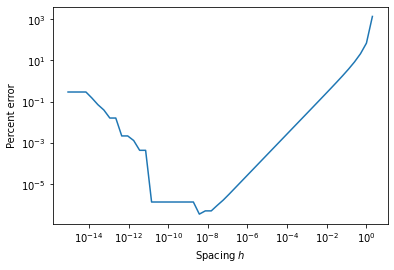

The minimum error occurs for h= 3.815e-06, and has a value of 4.0584e-10


In [ ]:
N = 52
h=np.zeros(N)
error_forward=np.zeros(N)

for i in range(N):
  h[i]=2**(i-50)
  x = np.array([0.5, 0.5 + h[i]])
  y = np.sin(x)  
  f_prime = np.diff(y)/np.diff(x)
  error_forward[i] = perc_error(f_prime,np.cos(0.5))

plt.loglog(h,error_forward)
plt.xlabel('Spacing $h$')
plt.ylabel('Percent error')
plt.show()

print("The minimum error occurs for h= %6.3e, and has a value of %6.4e"%(h[np.argmin(error)],np.min(error)))